In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from dotenv import find_dotenv, load_dotenv
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler

from src.visualization.visualize import crossvalidate_pipeline_scores, plot_scores

random_state = 123

# Setting styles
InteractiveShell.ast_node_interactivity = "all"
sns.set(style="whitegrid", color_codes=True, rc={"figure.figsize": (12.7, 9.27)})


In [2]:

data = pd.read_csv(os.path.join("data", "processed", "iphone.csv"))
target = "iphonesentiment"

X = data.drop(columns=target)
y = data[target]


 # Crossvalidation Results for Galaxy Data

 * Model hyperparameters and pipelines come from optimization notebooks
 * Random forest wins on all metrics

Crossvalidating KNN
Crossvalidating Gradient Boosting
Crossvalidating Random Forest


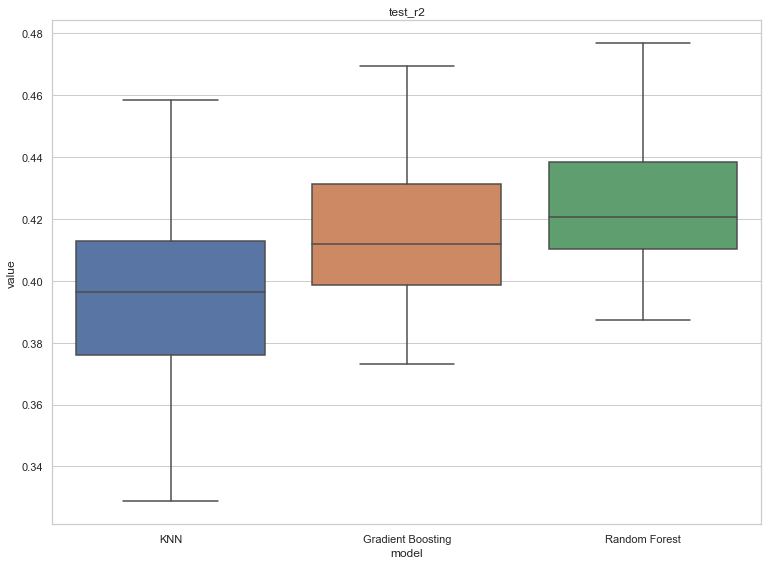

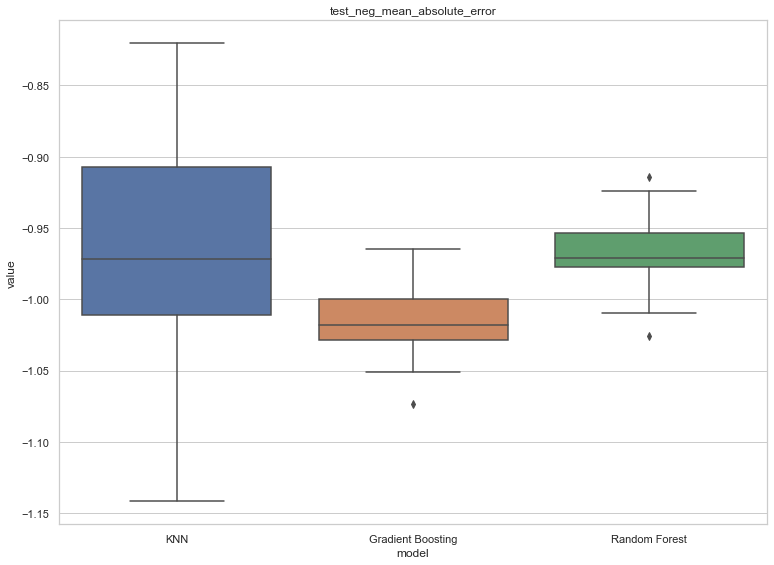

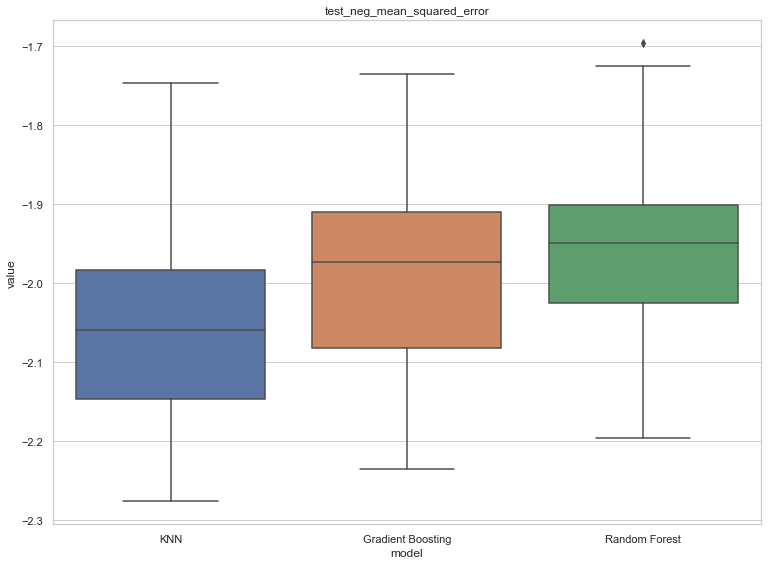

In [3]:

knn_features = [
    "iphone",
    "samsunggalaxy",
    "ios",
    "googleandroid",
    "iphonecampos",
    "samsungcampos",
    "iphonecamneg",
    "iphonecamunc",
    "iphonedispos",
    "samsungdispos",
    "iphonedisneg",
    "samsungdisneg",
    "iphonedisunc",
    "samsungdisunc",
    "iphoneperpos",
    "samsungperpos",
    "iphoneperneg",
    "samsungperneg",
    "iphoneperunc",
]
gradient_boosting_features = [
    "iphone",
    "samsunggalaxy",
    "googleandroid",
    "iphonecampos",
    "samsungcampos",
    "iphonecamneg",
    "iphonecamunc",
    "iphonedispos",
    "iphonedisneg",
    "samsungdisneg",
    "iphonedisunc",
    "samsungdisunc",
    "iphoneperpos",
    "samsungperpos",
    "samsungperneg",
]
random_forest_features = [
    "iphone",
    "samsunggalaxy",
    "ios",
    "googleandroid",
    "iphonecampos",
    "samsungcampos",
    "iphonecamneg",
    "samsungcamneg",
    "iphonecamunc",
    "samsungcamunc",
    "iphonedispos",
    "samsungdispos",
    "iphonedisneg",
    "samsungdisneg",
    "iphonedisunc",
    "samsungdisunc",
    "iphoneperpos",
    "samsungperpos",
    "iphoneperneg",
    "samsungperneg",
    "iphoneperunc",
    "samsungperunc",
    "googleperpos",
    "iosperunc",
    "googleperunc",
]


knn_feature_selector = X.columns.isin(knn_features)
gradient_boosting_feature_selector = X.columns.isin(gradient_boosting_features)
random_forest_feature_selector = X.columns.isin(random_forest_features)


def keep_knn_features(X):
    return X[:, knn_feature_selector]


def keep_gradient_boosting_features(X):
    return X[:, gradient_boosting_feature_selector]


def keep_random_forest_features(X):
    return X[:, random_forest_feature_selector]


pipelines = {
    "KNN": make_pipeline(
        VarianceThreshold(),
        RobustScaler(),
        FunctionTransformer(keep_knn_features, validate=False),
        KNeighborsRegressor(n_neighbors=15, p=1),
    ),
    "Gradient Boosting": make_pipeline(
        VarianceThreshold(),
        FunctionTransformer(keep_gradient_boosting_features, validate=False),
        GradientBoostingRegressor(),
    ),
    "Random Forest": make_pipeline(
        VarianceThreshold(),
        FunctionTransformer(keep_random_forest_features, validate=False),
        RandomForestRegressor(
            n_estimators=682, max_depth=12, min_samples_split=10, n_jobs=3
        ),
    ),
}

scores = crossvalidate_pipeline_scores(
    X=X, y=y, pipelines=pipelines, n_splits=30, random_state=random_state
)

plot_scores(scores=scores)
